## Customer Segmentation
## Project Based on Clustering 


## Summary:

The assignment involves a comprehensive customer analysis using a dataset containing purchase information across various product divisions for a retail company. The main objectives are to perform data mining tasks that include defining the business problem, preprocessing the data, conducting exploratory data analysis (EDA), applying clustering techniques, evaluating the clusters, and deriving actionable insights.

## Business problem

The data represents customer purchases across multiple product divisions (Clothing, Housewares, Health Products, Automotive, Personal Electronics, Computers, Garden, Novelty Gifts, and Jewelry).

Each row represents a unique customer with binary indicators (0 or 1) for purchases in each division.

The diverse range of product categories suggests a retail company with a wide array of offerings, making it ideal for cross-selling analysis.

The large number of customer records (over 500) provides sufficient data for meaningful segmentation and pattern identification.

## After Solving Business Problem is to get:

Identify distinct customer segments based on their purchasing behavior across divisions.

Develop targeted marketing strategies for each segment.

Uncover cross-selling opportunities by analyzing purchase patterns across divisions.

Optimize product recommendations to increase customer engagement and sales.

Improve inventory management and product placement based on customer preferences.

## Data Preprocessing 

Customer Number                  0
Clothing Division                0
Housewares Division              0
Health Products Division         0
Automotive Division              0
Personal Electronics Division    0
Computers Division               0
Garden Division                  0
Novelty Gift Division            0
Jewelry Division                 0
dtype: int64


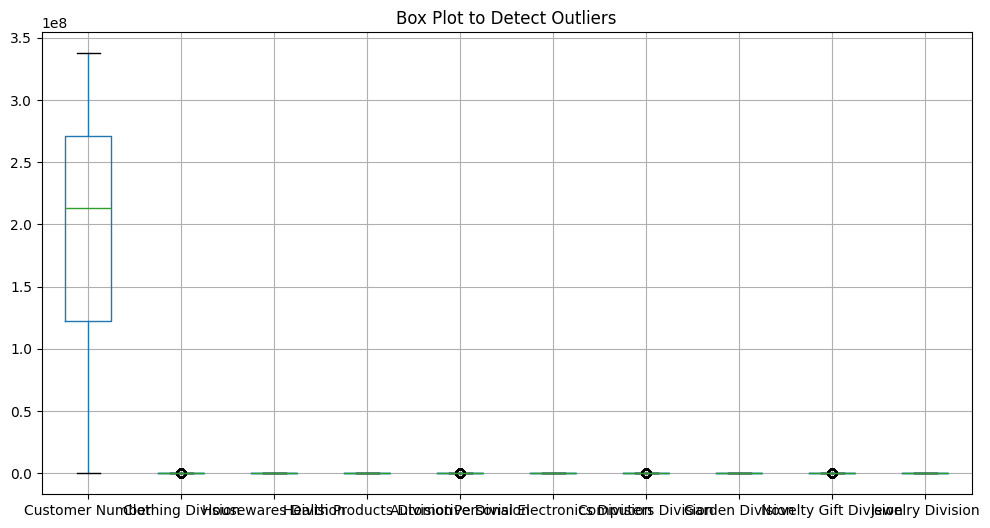

In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA

# Load the data
data = pd.read_csv(R"C:\Users\Rohit\Downloads\CatalogCrossSell.csv")

# Check for missing values
print(data.isnull().sum())

# No missing values to handle in this dataset

# Scale the data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(data.drop('Customer Number', axis=1))

# Check for outliers using box plots
plt.figure(figsize=(12, 6))
data.boxplot()
plt.title('Box Plot to Detect Outliers')
plt.show()

## Exploratory Data Analysis (EDA)

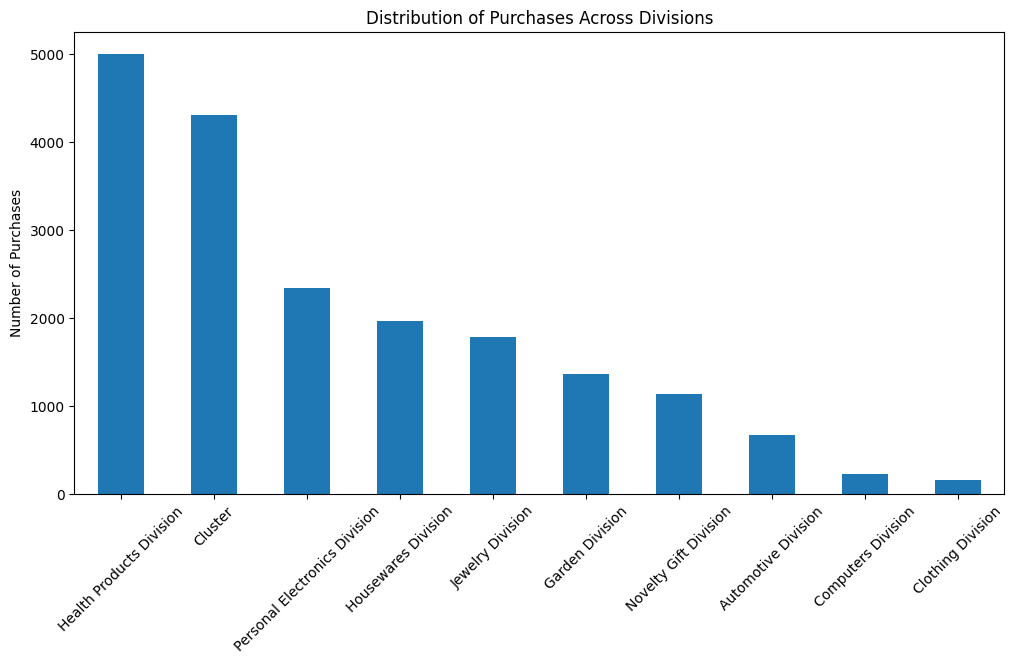

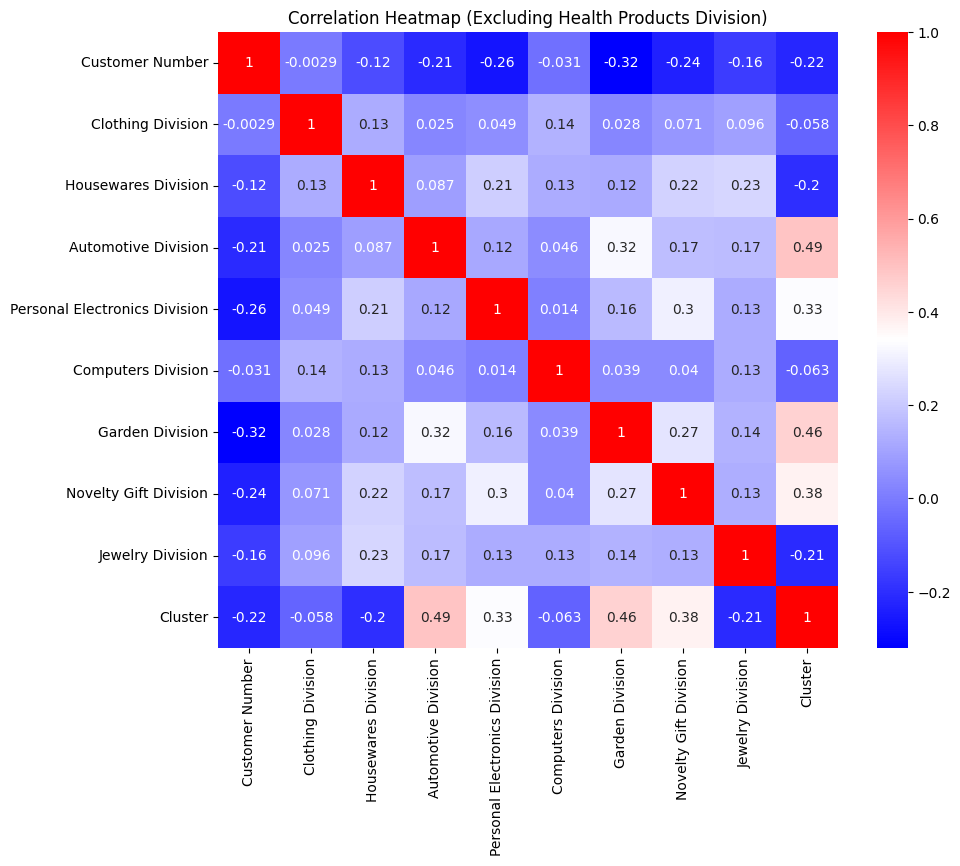

In [22]:
# Distribution of purchases across divisions
plt.figure(figsize=(12, 6))
data.drop('Customer Number', axis=1).sum().sort_values(ascending=False).plot(kind='bar')
plt.title('Distribution of Purchases Across Divisions')
plt.ylabel('Number of Purchases')
plt.xticks(rotation=45)
plt.show()

# Drop 'Health products division' column
data_filtered = data.drop(['Health Products Division'], axis=1)

## Dropping this variable because it shows blank in the entire heatmap due to the same value which is 1.

# Generate correlation heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(data_filtered.corr(), annot=True, cmap='bwr')
plt.title('Correlation Heatmap (Excluding Health Products Division)')
plt.show()

## Cluster Evaluation

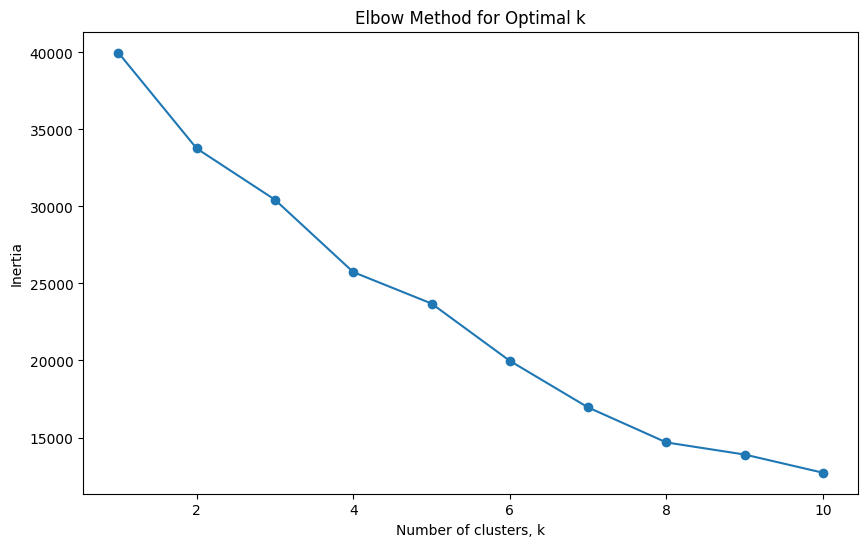

In [12]:
# Determine optimal number of clusters using elbow method
inertias = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(scaled_data)
    inertias.append(kmeans.inertia_)

plt.figure(figsize=(10, 6))
plt.plot(range(1, 11), inertias, marker='o')
plt.title('Elbow Method for Optimal k')
plt.xlabel('Number of clusters, k')
plt.ylabel('Inertia')
plt.show()

# Perform clustering with optimal k
optimal_k = 3  # Adjust based on elbow method results
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
cluster_labels = kmeans.fit_predict(scaled_data)

# Add cluster labels to the original dataframe
data['Cluster'] = cluster_labels

## Application

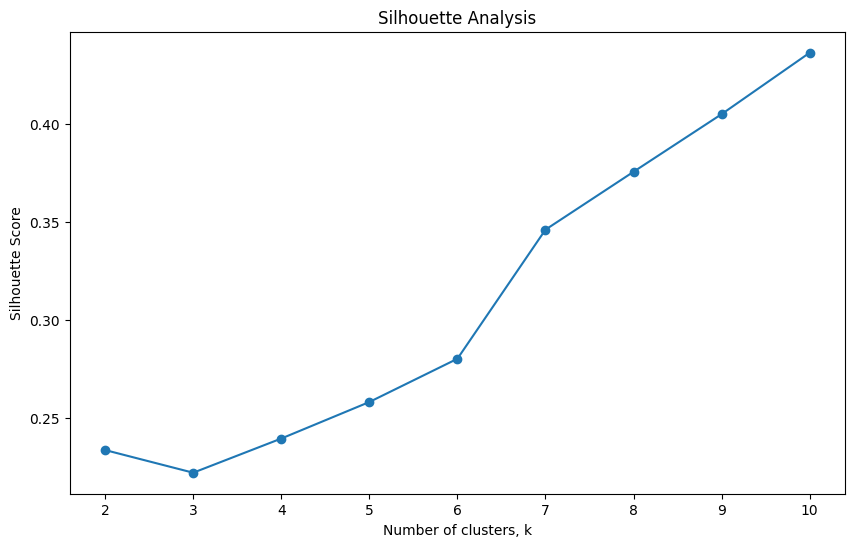

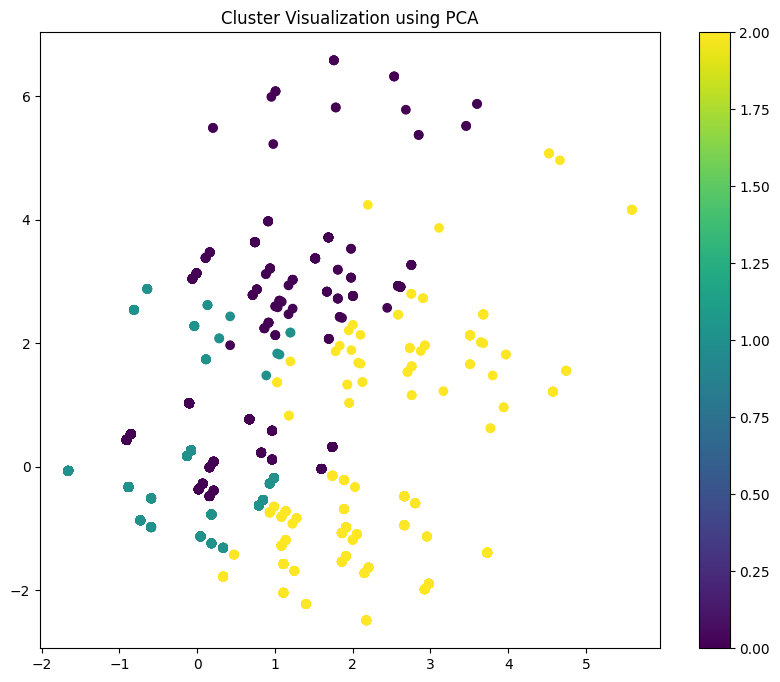

In [19]:
# Silhouette analysis
silhouette_scores = []
for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(scaled_data)
    score = silhouette_score(scaled_data, kmeans.labels_)
    silhouette_scores.append(score)

plt.figure(figsize=(10, 6))
plt.plot(range(2, 11), silhouette_scores, marker='o')
plt.title('Silhouette Analysis')
plt.xlabel('Number of clusters, k')
plt.ylabel('Silhouette Score')
plt.show()

# Visualize clusters using PCA
pca = PCA(n_components=2)
pca_result = pca.fit_transform(scaled_data)

plt.figure(figsize=(10, 8))
scatter = plt.scatter(pca_result[:, 0], pca_result[:, 1], c=cluster_labels, cmap='viridis')
plt.title('Cluster Visualization using PCA')
plt.colorbar(scatter)
plt.show()

## Analyzing Clusters

In [21]:
# Analyze clusters
for cluster in range(optimal_k):
    print(f"Cluster {cluster}:")
    print(data[data['Cluster'] == cluster].mean())
    print("\n")

Cluster 0:
Customer Number                  2.016368e+08
Clothing Division                6.640877e-02
Housewares Division              7.143778e-01
Health Products Division         1.000000e+00
Automotive Division              4.319794e-02
Personal Electronics Division    2.669246e-01
Computers Division               9.284333e-02
Garden Division                  1.521599e-01
Novelty Gift Division            1.360413e-01
Jewelry Division                 7.001934e-01
Cluster                          0.000000e+00
dtype: float64


Cluster 1:
Customer Number                  2.050245e+08
Clothing Division                6.558642e-03
Housewares Division              1.361883e-01
Health Products Division         1.000000e+00
Automotive Division              2.391975e-02
Personal Electronics Division    4.891975e-01
Computers Division               9.259259e-03
Garden Division                  1.493056e-01
Novelty Gift Division            1.304012e-01
Jewelry Division                 7.716049

## A. Type of company:

## This customer data likely pertains to a multi-division retail company offering a wide range of products across various categories such as clothing, housewares, health products, automotive, electronics, computers, garden supplies, novelty gifts, and jewelry.



## B. Patterns in customer behavior:

## Cluster 0:

High engagement in Housewares (71.4%) and Jewelry (70%) divisions
Moderate engagement in Personal Electronics (26.7%)
Low engagement in other divisions

## Cluster 1:

Moderate engagement in Personal Electronics (48.9%)
Low engagement in all other divisions except Health Products

## Cluster 2:

High engagement across multiple divisions: Garden (86.2%), Personal Electronics (76.5%), Automotive (63.7%), Housewares (59.2%), Jewelry (58.2%), and Novelty Gift (68.8%)
Moderate engagement in Computers (7.7%) compared to other clusters

## Common patterns across all clusters:

All clusters show 100% engagement in the Health Products division
Clothing division has consistently low engagement across all clusters

## These patterns suggest three distinct customer segments:

Home and Jewelry Enthusiasts (Cluster 0): Customers who primarily focus on housewares and jewelry, with some interest in personal electronics.

Health-Focused Minimalists (Cluster 1): Customers who mainly purchase health products and have moderate interest in personal electronics, but minimal engagement in other divisions.

Multi-Category Shoppers (Cluster 2): Customers who actively engage across most product divisions, showing a diverse range of interests and purchasing behaviors. 

## C. Actionable insights and recommendations

## Cross-selling opportunities:

Target customers who purchase from the Health Products Division (100% engagement across all clusters) with complementary products from other divisions, especially Personal Electronics and Housewares.

Develop bundled offers combining items from high-engagement divisions (e.g., Health Products, Housewares, and Jewelry) to encourage multi-category purchases.

## Personalized marketing:

Tailor marketing campaigns for each customer segment based on their purchasing patterns. For example, focus on home-related products for Cluster 0, health and electronics for Cluster 1, and diverse product ranges for Cluster 2.

Implement a loyalty program that rewards customers for purchasing across multiple divisions, encouraging them to explore new product categories.

## Product development and inventory management:

Invest in expanding the Health Products Division, as it shows consistent demand across all customer segments.

Consider phasing out or revamping the Clothing Division, which shows low engagement across all clusters.

Optimize inventory levels based on cluster preferences, ensuring adequate stock for high-demand divisions.

## Customer experience enhancement:

Create curated product collections or "starter kits" for each cluster, making it easier for customers to discover new items within their preferred categories.

Implement a recommendation engine on the company's e-commerce platform that suggests products based on cluster behavior.

## Targeted promotions:

Offer special discounts or exclusive access to new products in the Garden and Novelty Gift Divisions for Cluster 2 customers, as they show higher engagement in these categories.

Create limited-time offers that encourage Cluster 1 customers to explore divisions beyond Health Products and Personal Electronics.

## Customer acquisition and retention:

Develop marketing strategies to attract more customers similar to those in Cluster 2, as they engage with a wider range of product divisions.

Implement a win-back campaign for Cluster 1 customers, focusing on introducing them to products from divisions they haven't explored yet.

## Store layout and product placement:

For physical stores, organize layouts to encourage cross-division shopping, placing complementary products from different divisions near each other.

Create prominent displays featuring products from the Health Products Division near other sections to capitalize on its universal appeal.

## Data-driven decision making:

Regularly update the cluster analysis to track changes in customer behavior and adjust strategies accordingly.

Conduct further analysis to understand the factors driving the high engagement in the Health Products Division and apply these insights to other divisions.